# Python Tutorial for LinkUp Data

You should install the following packages (through `pip install`) prior to proceeding:
* **matplotlib** (http://matplotlib.org)
* **numpy** (http://www.numpy.org)
* **pandas** (http://pandas.pydata.org)
* **seaborn** (http://seaborn.pydata.org)
* **sklearn** (http://scikit-learn.org/stable/)

Tutorial links (if they exist) are listed above in parentheses next to their respective packages.

In [66]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Brief tutorial on how to read companies and jobs data into pandas dataframes

For faster reads, consider saving these files locally instead of using the web endpoints.

In [67]:
companies = pd.read_csv("https://s3-us-west-2.amazonaws.com/correlation1-public/MITDatathon2017/companies.csv")

In [68]:
companies.head()

,name,last_scrape_date,first_scrape_date,city,state,country,ticker_main,ticker_ric,entity_id,bloomberg_id,scraping_url,trc_business_sector,trc_economic_sector,trc_industry_sector,trc_industry_group
0,Target,2017-02-19,2007-12-11,Minneapolis,MN,US,TGT,TGT.N,22560.0,TGT,http://www.target.com,Retailers,Consumer Cyclicals,Discount Stores,Diversified Retail
1,General Mills Inc.,2017-02-17,2007-12-03,Minneapolis,MN,US,GIS,GIS.N,24428.0,GIS,http://www.generalmills.com,Food & Beverages,Consumer Non-Cyclicals,Food Processing,Food & Tobacco
2,Ecolab Inc.,2017-02-16,2008-08-20,Saint Paul,MN,US,ECL,ECL.N,23051.0,ECL,http://www.ecolab.com,Industrial & Commercial Services,Industrials,Business Support Services,Professional & Commercial Services
3,Wilsons Leather,2017-02-19,2008-12-07,Brooklyn Park,MN,US,PRVU,PRVU.PK,108000693.0,PRVU,http://www.wilsonsleather.com/,NaN,NaN,NaN,NaN
4,Hawkins Chemical,2017-02-18,2008-07-06,Minneapolis,MN,US,HWKN,HWKN.OQ,25234.0,HWKN,http://www.hawkinsinc.com,Chemicals,Basic Materials,Diversified Chemicals,Chemicals


In [69]:
companies[companies.name=="Target"]

,name,last_scrape_date,first_scrape_date,city,state,country,ticker_main,ticker_ric,entity_id,bloomberg_id,scraping_url,trc_business_sector,trc_economic_sector,trc_industry_sector,trc_industry_group
0,Target,2017-02-19,2007-12-11,Minneapolis,MN,US,TGT,TGT.N,22560.0,TGT,http://www.target.com,Retailers,Consumer Cyclicals,Discount Stores,Diversified Retail
22475,Target,2017-02-17,2013-05-10,Melbourne,State of Victoria,AU,TEX.AX,TEX.AX,102033625.0,NaN,http://www.target.com.au/,Energy - Fossil Fuels,Energy,Oil & Gas Exploration and Production,Oil & Gas


In [70]:
jobs = pd.read_csv("https://s3-us-west-2.amazonaws.com/correlation1-public/MITDatathon2017/jobs.csv.gz", compression='gzip')

In [71]:
jobs.head()

,hash,company_id,company_name,title,created_date,last_checked_date,city,state,zip,country,category_id,category_name
0,000001a5f7022973b3d8b7b2c3e24082,420,SAIC,Sr. Environmental Engineer,2008-12-01,2008-12-01,Harrisburg,PA,17106,US,21,"Agriculture, Forestry & Fishing"
1,000005782bc4ce081dd656ee55b405b2,17976,Emcor,Carpenter Journeyman,2010-03-17,2010-03-17,U S A F Academy,CO,80841,US,30,Construction & Skilled Trade
2,000010b1e01a832cd8e725f9552ff9ba,9208,Wyndham Hotels and Resorts LLC,Guest Services Associate - Wyndham Arrow Point...,2015-05-28,2015-05-28,Harrison,ID,83833,US,70,Concierge & Guest Services
3,000011518dfb25f79fdddc85376099e2,12084,Fluor Corporation,Principal HR/IR Technician,2016-06-03,2016-07-28,Waynesboro,GA,30830,US,77,Human Resources
4,000014a0c96182242b75a1ba47a1b582,420,SAIC,Test Engineer (OS),2008-12-15,2008-12-15,Columbia,MD,21044,US,43,Engineering & Architecture


### Demonstration plot: How has the number of new job postings in technology changed over time?

We will produce a plot in two steps:
1. Take the jobs data and filter it by job category for technology
2. Group the filtered data by create_dTake daily counts and then create a 2-D plot

In [72]:
jobs_in_tech = jobs[jobs.category_name=='Technology']
by_day = jobs_in_tech.groupby('created_date')

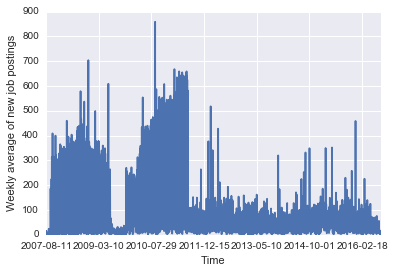

In [73]:
ax = by_day['category_name'].count().plot()
ax.set_xlabel('Time')
ax.set_ylabel('Weekly average of new job postings')